In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [75]:
## Importing Data
df=pd.read_csv("./tb2/IBM.csv")

In [76]:
# Top 5 Rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [77]:
## Display all column names
names = df.columns.values 
print(names)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [78]:
df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [79]:
y = df['Attrition']

# Exploratory Data Analysis

In [80]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of unique values 2
RelationshipSatisfaction: Number of unique values 4
StockOptionLev

In [81]:
df.drop(['EmployeeCount'], axis="columns", inplace=True)

In [82]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [83]:
len(object_col)

7

In [84]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [85]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [86]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


## Confusion Matrix

C:\Users\indah\AppData\Local\Temp\ipykernel_8792\1625585791.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


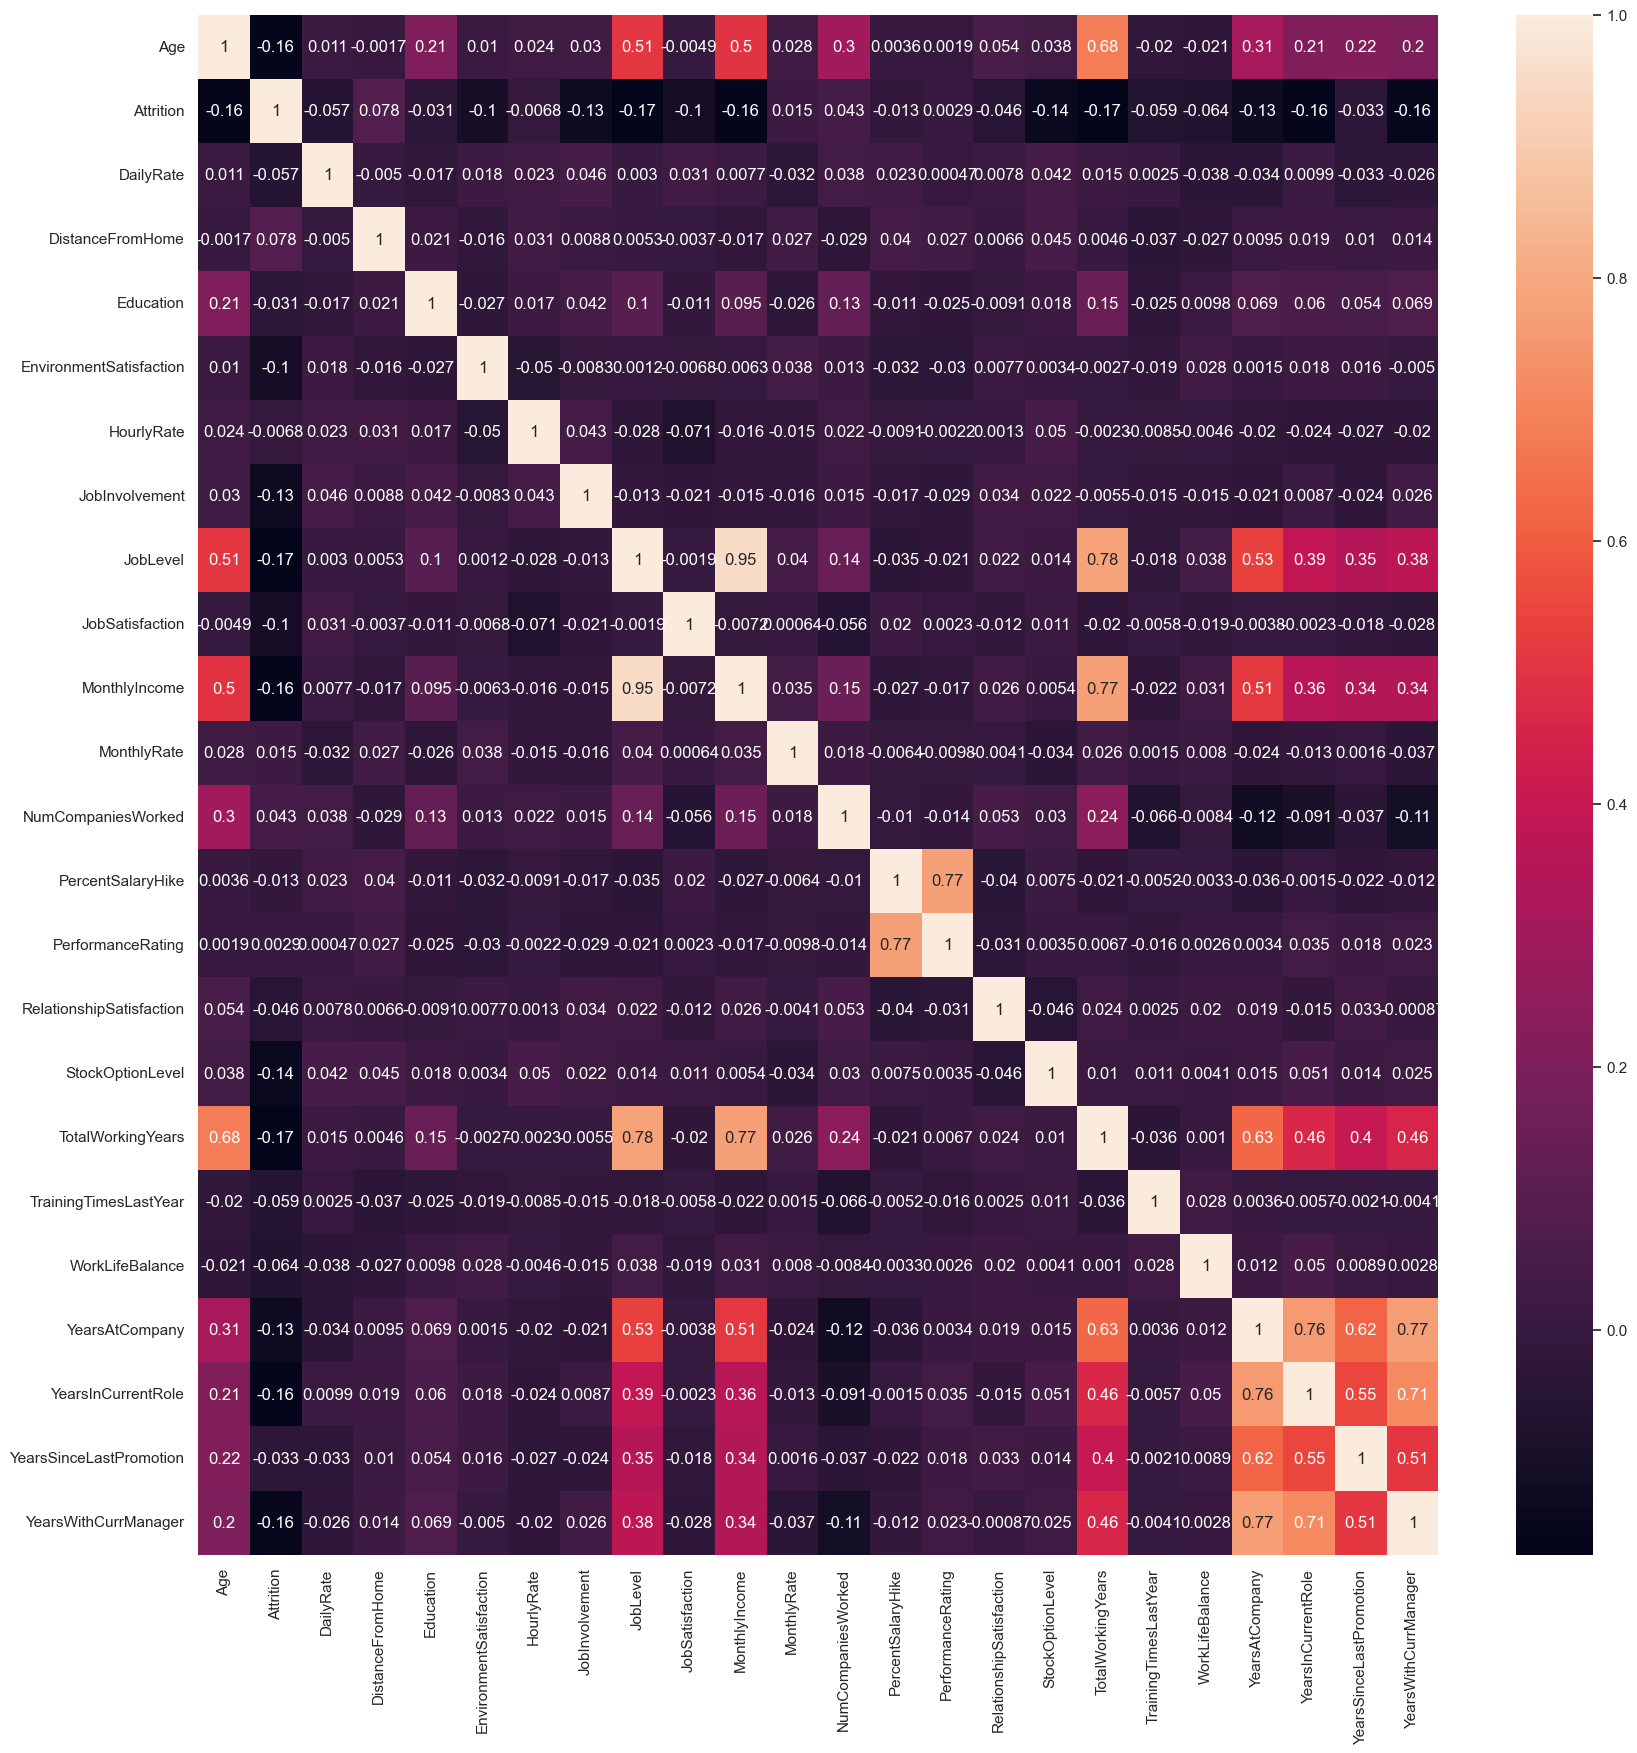

In [87]:
plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True)
plt.show()

In [88]:
df.shape

(1470, 31)

In [90]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [91]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']
x = pd.get_dummies(x)

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=12)
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\indah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
print("Coeff:", model.coef_)
print("Intercept:", model.intercept_)

Coeff: [[ 3.86979733e-03 -1.14938155e-05  2.63944760e-02  5.07241197e-04
   3.64417698e-03 -5.45540799e-02 -2.59649955e-03 -5.39454651e-02
  -7.95063654e-03 -8.22726550e-02 -2.93105263e-06  5.86177074e-06
   1.24156393e-01 -1.64338822e-02  1.26645324e-02 -1.81042075e-02
  -8.50530982e-02 -8.69748404e-02 -3.80194994e-02 -2.42195259e-02
   5.72276351e-03 -9.59658990e-02  1.28288101e-01 -1.13193104e-01
  -1.98850172e-02  3.95341071e-02 -1.60049129e-02  3.60403492e-03
  -3.98839512e-02  3.99240933e-02  5.71880593e-03 -6.87822431e-03
   1.79080186e-02 -2.70955658e-02 -1.50059905e-03  1.54917417e-02
  -1.09611707e-02  1.46053477e-02 -1.45446534e-02  4.39589799e-03
   1.21967494e-02  1.35164193e-03 -1.38693969e-02 -2.36931181e-03
  -2.15877035e-02  1.48708553e-02  2.32000980e-02 -2.49622210e-02
  -2.36970410e-02  5.23034391e-02 -8.50799976e-02  8.87241745e-02]]
Intercept: [0.0036442]


In [66]:
Y_train_predict = model.predict(X_train)
Y_test_predict = model.predict(X_test)
Y_train_predict_df = pd.DataFrame(Y_train_predict)
df_ytrain = pd.concat([X_train,Y_train_predict_df],axis=1)
df_ytrain.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,0
138,25.0,959.0,28.0,3.0,1.0,1.0,41.0,2.0,2.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
522,37.0,1225.0,10.0,2.0,1.0,4.0,80.0,4.0,1.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
141,45.0,1316.0,29.0,3.0,1.0,3.0,83.0,3.0,1.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
715,33.0,827.0,1.0,4.0,1.0,3.0,84.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1168,24.0,567.0,2.0,1.0,1.0,1.0,32.0,3.0,1.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN


In [71]:
results = confusion_matrix(Y_train,Y_train_predict)
print("confusion matrix - Train:\n", results)
print("accuracy score - Train:\n", accuracy_score(Y_train,Y_train_predict))
print("classifcation report - Train :\n",classification_report(Y_train,Y_train_predict))

confusion matrix - Train:
 [[860   3]
 [163   3]]
accuracy score - Train:
 0.8386783284742468
classifcation report - Train :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       863
           1       0.50      0.02      0.03       166

    accuracy                           0.84      1029
   macro avg       0.67      0.51      0.47      1029
weighted avg       0.79      0.84      0.77      1029



In [73]:
Y_test.value_counts()[0] / Y_test.shape[0]

0.8390022675736961

In [92]:
# Membuat dataset sintetis untuk contoh
X, Y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [93]:
# Melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [112]:
Y_pred_proba = model.predict_proba(X_test)[:, 1]

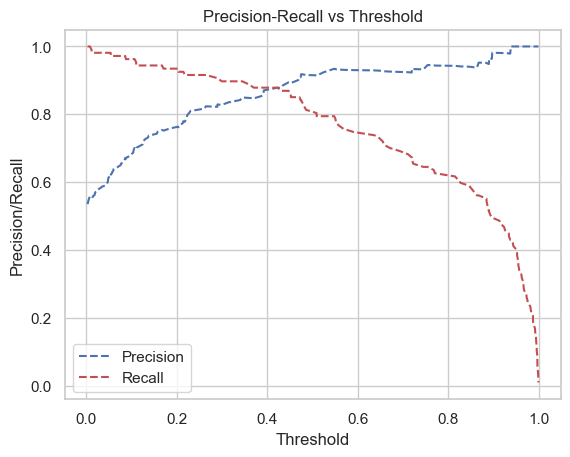

In [113]:
# Menghitung precision, recall, dan threshold
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_proba)

# Plot plot_precision_recall vs threshold
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.show()

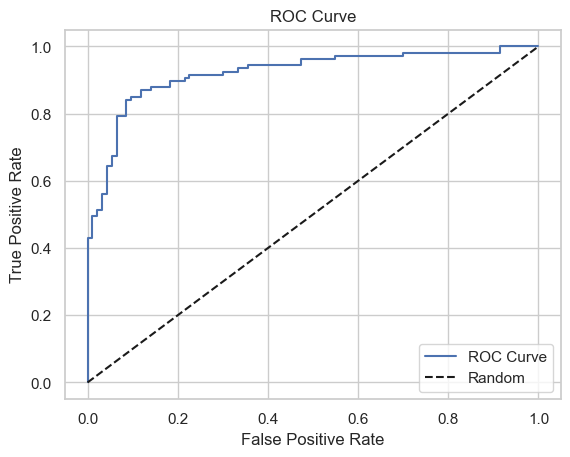

In [108]:
# Menghitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

# Plot roc_curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [97]:
# Menghitung nilai roc_auc_score
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.9216159179981912
